In [1]:
# list all jpg files in the "C:\Users\robert\OneDrive\MSc\p3.1 - cognitive science\project\repo\stimuli" directory
import os
import glob
from pathlib import Path
jpg_files = glob.glob('C:/Users/robert/OneDrive/MSc/p3.1 - cognitive science/project/repo/stimuli/*.jpg')
l = [Path(f).parts[-1]+'\n' for f in jpg_files]

with open('files.txt', 'w') as f:
    f.writelines(sorted(l))

In [2]:
import pandas as pd

# Load the dataset
file_path = 'synthetic_enriched_gt.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       4000 non-null   int64  
 1   trial_no         4000 non-null   int64  
 2   filename         4000 non-null   object 
 3   gender           4000 non-null   object 
 4   age              4000 non-null   int64  
 5   experience       4000 non-null   object 
 6   favorite_team    4000 non-null   object 
 7   favorite_color   4000 non-null   object 
 8   sim_psucc        4000 non-null   float64
 9   impaired_vision  4000 non-null   bool   
 10  response_time    4000 non-null   float64
 11  response_side    4000 non-null   object 
 12  scene_id         4000 non-null   int64  
 13  red_count        4000 non-null   int64  
 14  blue_count       4000 non-null   int64  
 15  expected_side    4000 non-null   object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 47

(None,
    subject_id  trial_no           filename gender  age  experience  \
 0           0         0  id13_v1_r5_b6.jpg      m   33        more   
 1           0        41  id13_v2_r6_b5.jpg      m   33        more   
 2           1        28  id13_v1_r6_b5.jpg      f   27        more   
 3           1        61  id13_v2_r5_b6.jpg      f   27        more   
 4           2        33  id13_v1_r5_b6.jpg      m   35  last-month   
 
   favorite_team favorite_color  sim_psucc  impaired_vision  response_time  \
 0          blue        neither   0.519147            False     891.843737   
 1          blue        neither   0.730502            False     794.683522   
 2       neither        neither   0.627681            False     954.500743   
 3       neither        neither   0.679476            False    1109.411477   
 4          blue           blue   0.716797            False     850.011198   
 
   response_side  scene_id  red_count  blue_count expected_side  
 0           red        13   

In [3]:
# Descriptive statistics for numerical variables
desc_stats = data[['age', 'response_time', 'red_count', 'blue_count']].describe()

desc_stats

,age,response_time,red_count,blue_count
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,29.100000,937.843431,5.500000,5.500000
std,4.989612,186.194777,0.500063,0.500063
min,20.000000,367.032335,5.000000,5.000000
25%,25.000000,803.022873,5.000000,5.000000
50%,28.500000,921.263010,5.500000,5.500000
75%,34.000000,1052.953665,6.000000,6.000000
max,37.000000,1762.879380,6.000000,6.000000


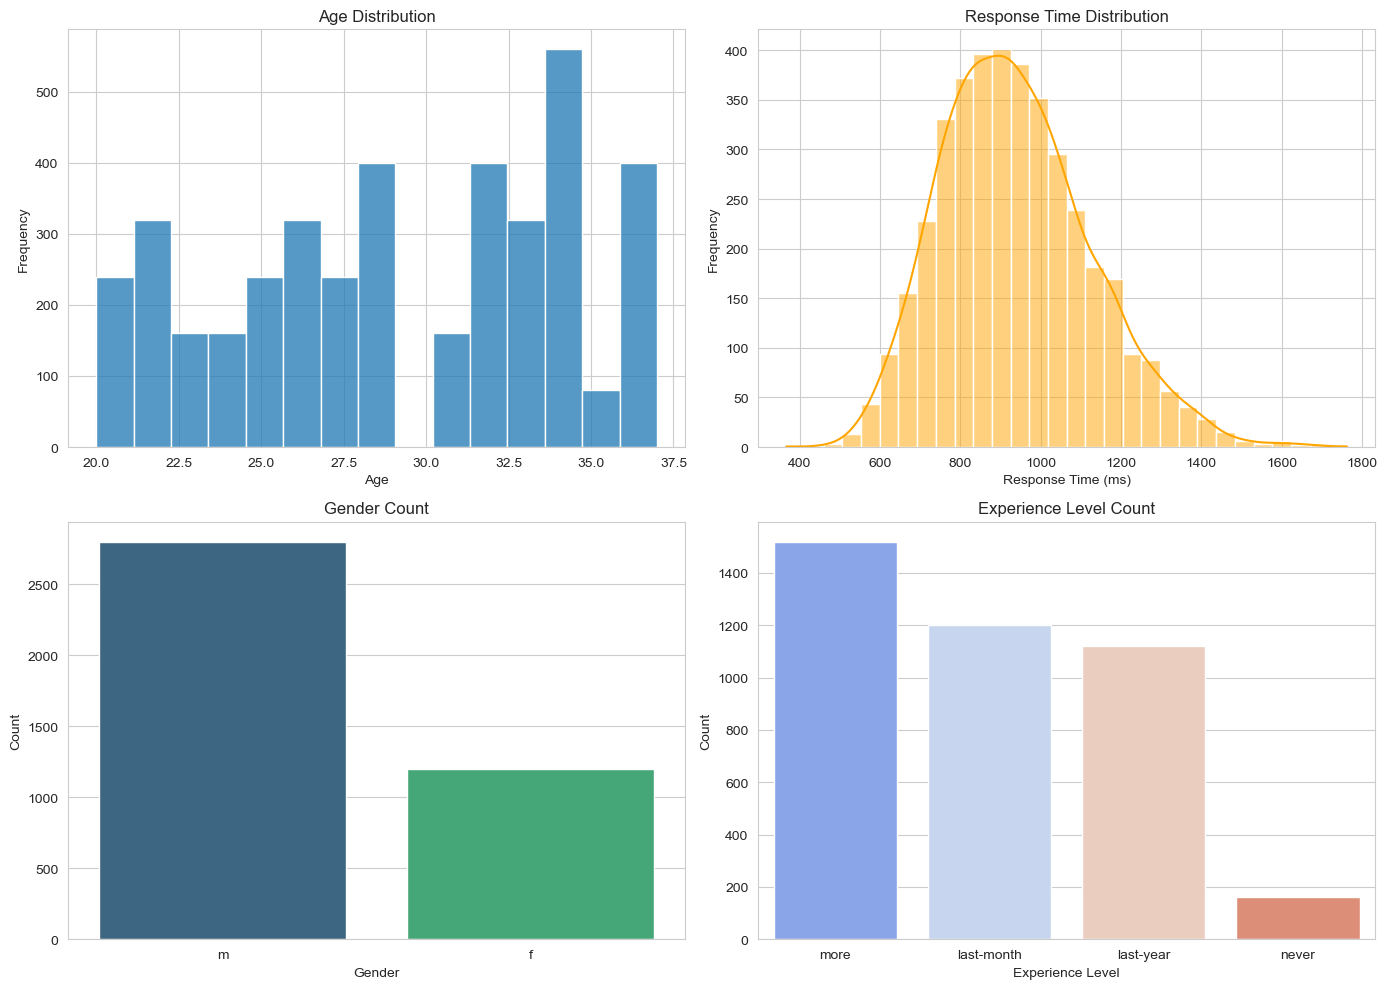

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the distribution of 'age'
sns.histplot(data['age'], bins=15, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of 'response_time'
sns.histplot(data['response_time'], bins=30, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Response Time Distribution')
axes[0, 1].set_xlabel('Response Time (ms)')
axes[0, 1].set_ylabel('Frequency')

# Count plot for 'gender'
sns.countplot(x='gender', data=data, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Gender Count')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Count plot for 'experience'
sns.countplot(x='experience', data=data, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Experience Level Count')
axes[1, 1].set_xlabel('Experience Level')
axes[1, 1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


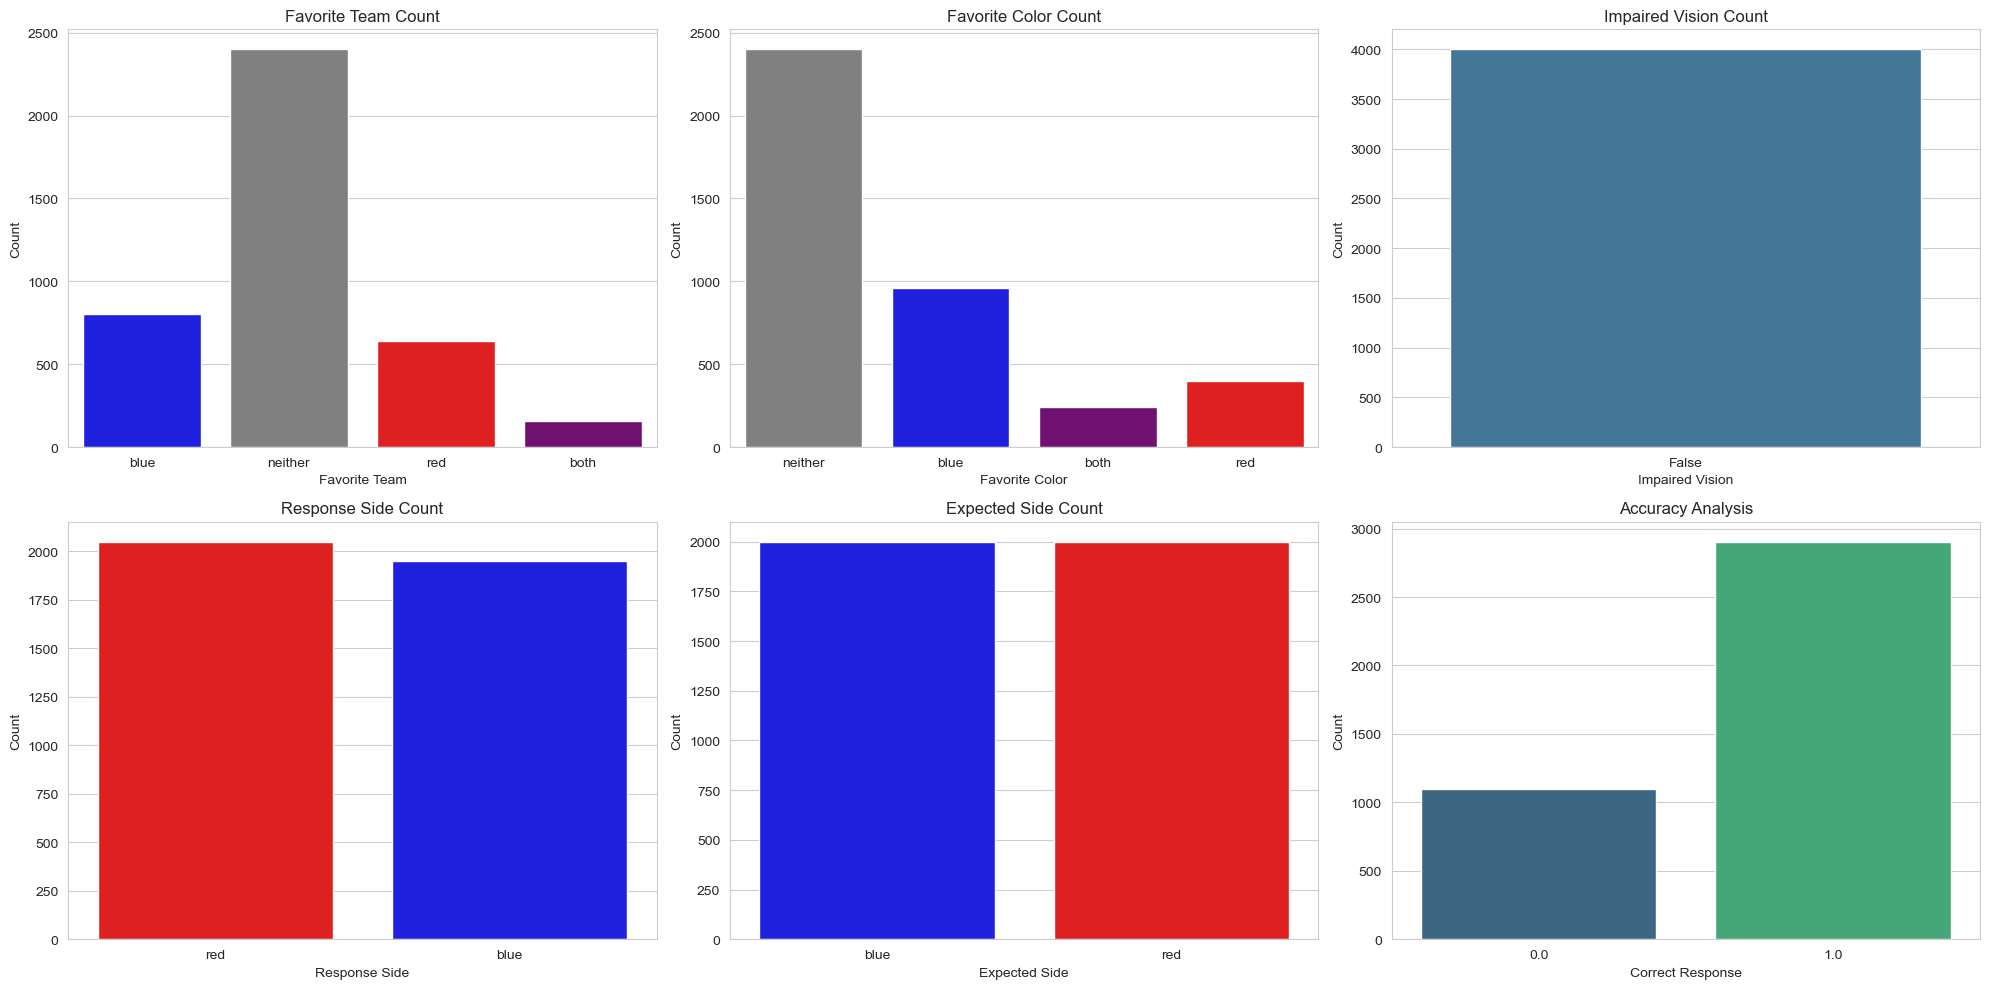

In [5]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Custom color mappings
color_mappings = {'blue': 'blue', 'red': 'red', 'neither': 'grey', 'both': 'purple'}

# Count plot for 'favorite_team'
sns.countplot(x='favorite_team', data=data, ax=axes[0, 0], palette=color_mappings)
axes[0, 0].set_title('Favorite Team Count')
axes[0, 0].set_xlabel('Favorite Team')
axes[0, 0].set_ylabel('Count')

# Count plot for 'favorite_color'
sns.countplot(x='favorite_color', data=data, ax=axes[0, 1], palette=color_mappings)
axes[0, 1].set_title('Favorite Color Count')
axes[0, 1].set_xlabel('Favorite Color')
axes[0, 1].set_ylabel('Count')

# Count plot for 'impaired_vision'
sns.countplot(x='impaired_vision', data=data, ax=axes[0, 2], palette='mako')
axes[0, 2].set_title('Impaired Vision Count')
axes[0, 2].set_xlabel('Impaired Vision')
axes[0, 2].set_ylabel('Count')

# Count plot for 'response_side'
sns.countplot(x='response_side', data=data, ax=axes[1, 0], palette={'red': 'red', 'blue': 'blue'})
axes[1, 0].set_title('Response Side Count')
axes[1, 0].set_xlabel('Response Side')
axes[1, 0].set_ylabel('Count')

# Count plot for 'expected_side'
sns.countplot(x='expected_side', data=data, ax=axes[1, 1], palette={'red': 'red', 'blue': 'blue'})
axes[1, 1].set_title('Expected Side Count')
axes[1, 1].set_xlabel('Expected Side')
axes[1, 1].set_ylabel('Count')

# Accuracy analysis
# Creating a new column 'is_correct' that is True when response_side equals expected_side and False otherwise
data['is_correct'] = (data['response_side'] == data['expected_side']).astype(float)
sns.countplot(x='is_correct', data=data, ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title('Accuracy Analysis')
axes[1, 2].set_xlabel('Correct Response')
axes[1, 2].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


<Axes: xlabel='is_correct', ylabel='Count'>

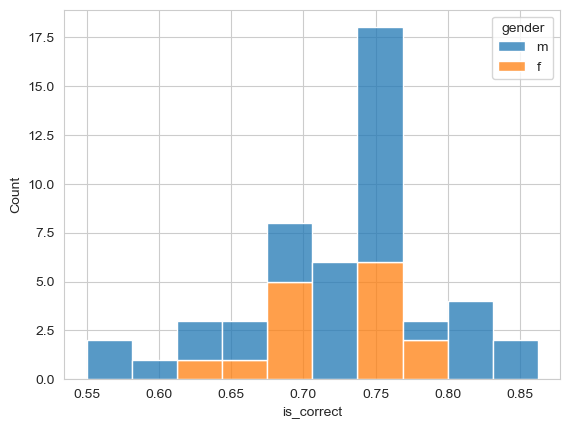

In [6]:
# histograms of accuracy
_df = data.groupby(['subject_id', 'gender']).is_correct.mean().reset_index()
sns.histplot(data=_df, x='is_correct', hue='gender', multiple='stack')

We'll explore how different factors influence accuracy by visualizing the proportion of correct responses across various categories. Specifically, we'll examine:

* Gender
* Experience Level
* Favorite Team
* Favorite Color

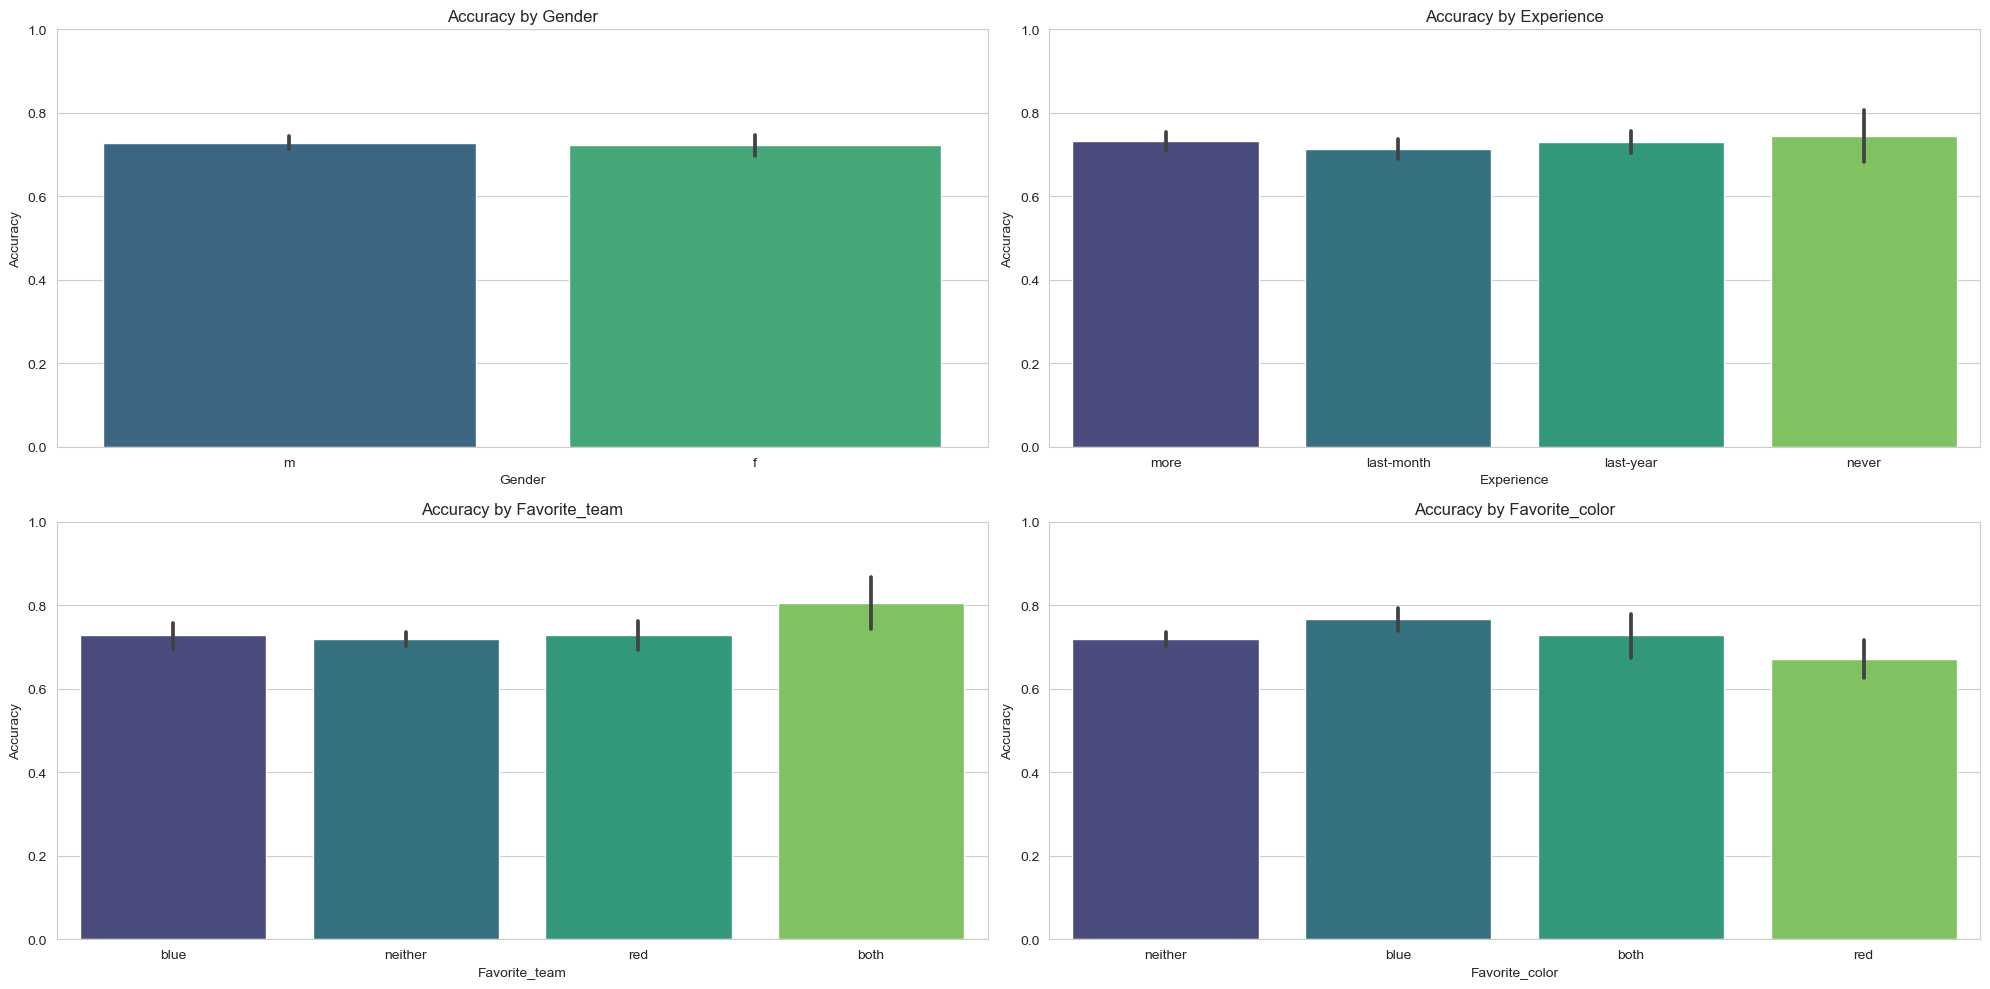

In [7]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# List of variables to plot
#variables_to_plot = ['gender', 'experience', 'favorite_team', 'favorite_color', 'impaired_vision']
variables_to_plot = ['gender', 'experience', 'favorite_team', 'favorite_color']

# Loop through the variables and create bar plots
for i, var in enumerate(variables_to_plot):
    ax = axes[i//2, i%2]
    sns.barplot(x=var, y='is_correct', data=data, ax=ax, palette=color_mappings if var in color_mappings else 'viridis')
    ax.set_title(f'Accuracy by {var.capitalize()}')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0, 1)  # as accuracy is a proportion, limit y-axis to 1

# Adjust the layout
plt.tight_layout()
plt.show()


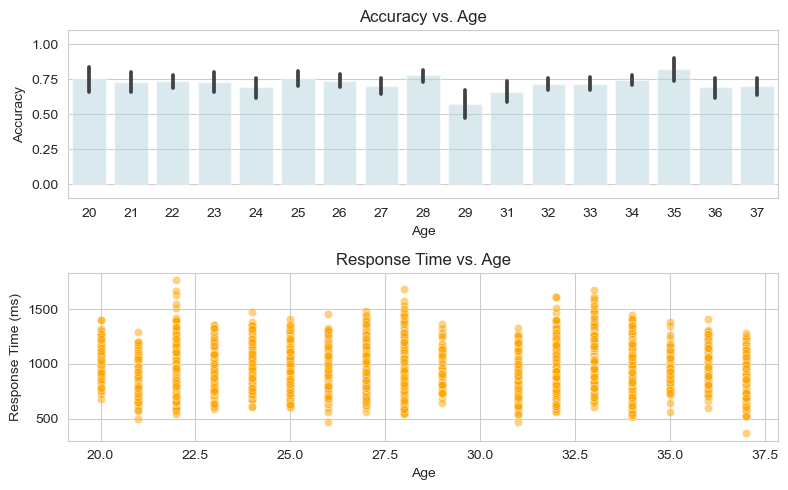

In [8]:
# Initialize a 1x2 grid of plots
fig, axes = plt.subplots(2, 1, figsize=(8, 5))

data['age'] = data['age'].astype(int)
# Scatter plot for Accuracy vs. Age
sns.barplot(x='age', y='is_correct', data=data, ax=axes[0], color='lightblue', alpha=0.5)
axes[0].set_title('Accuracy vs. Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(-0.1, 1.1)  # as accuracy is a proportion, limit y-axis to 1

# Scatter plot for Response Time vs. Age
sns.scatterplot(x='age', y='response_time', data=data, ax=axes[1], color='orange', alpha=0.5)
axes[1].set_title('Response Time vs. Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Response Time (ms)')

# Adjust the layout
plt.tight_layout()
plt.show()


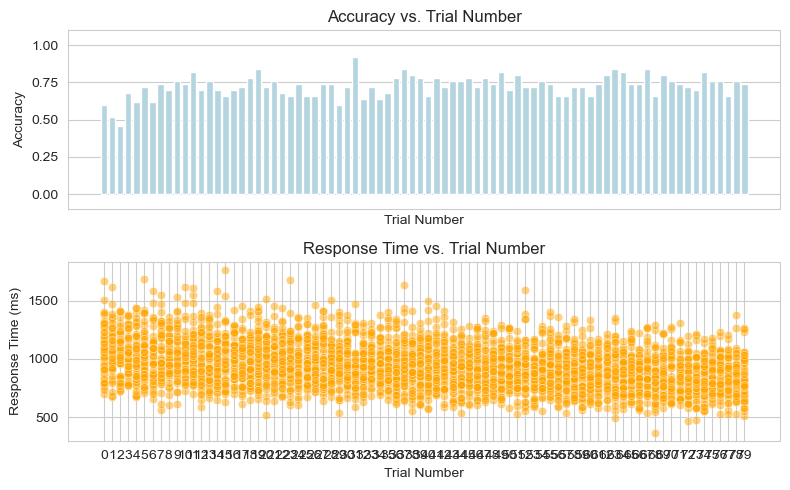

In [9]:
# Initialize a 1x2 grid of plots
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

# Box plot for Accuracy vs. Trial Number
sns.barplot(x='trial_no', y='is_correct', data=data, ax=axes[0], color='lightblue', errorbar=None)
axes[0].set_title('Accuracy vs. Trial Number')
axes[0].set_xlabel('Trial Number')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(-0.1, 1.1)  # as accuracy is a proportion, limit y-axis to 1

# Scatter plot for Response Time vs. Trial Number
sns.scatterplot(x='trial_no', y='response_time', data=data, ax=axes[1], color='orange', alpha=0.5)
axes[1].set_title('Response Time vs. Trial Number')
axes[1].set_xlabel('Trial Number')
axes[1].set_ylabel('Response Time (ms)')

# Adjust the layout
plt.tight_layout()
plt.show()


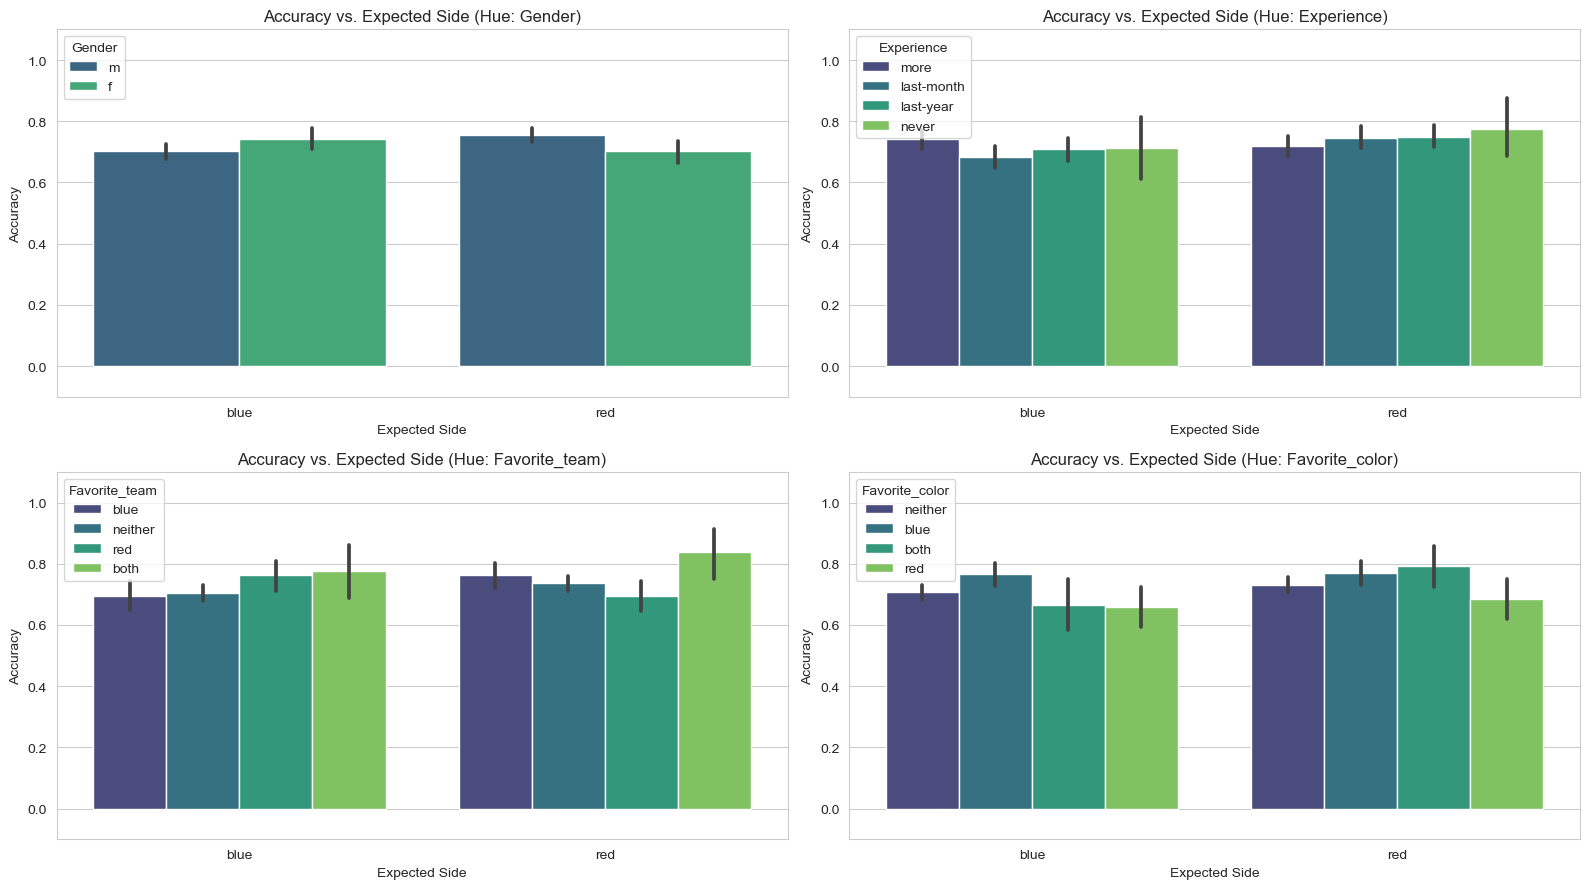

In [10]:
# Initialize a 2x3 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# Variables for hue
hue_variables = ['gender', 'experience', 'favorite_team', 'favorite_color']

# Loop through the hue variables and create box plots
for i, hue_var in enumerate(hue_variables):
    ax = axes[i//2, i%2]
    sns.barplot(x='expected_side', y='is_correct', hue=hue_var, data=data, ax=ax, palette='viridis')
    ax.set_title(f'Accuracy vs. Expected Side (Hue: {hue_var.capitalize()})')
    ax.set_xlabel('Expected Side')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(-0.1, 1.1)  # as accuracy is a proportion, limit y-axis to 1
    ax.legend(title=hue_var.capitalize(), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()
